In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv(r"C:\Users\Data_Science\Practice_datasets\diabetic_data.csv")

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
df["readmitted"].count()

np.int64(101766)

In [10]:
df.groupby("readmitted")["readmitted"].count()

readmitted
<30    11357
>30    35545
NO     54864
Name: readmitted, dtype: int64

In [11]:
!pip install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imblearn]
   ---------------------------------------- 2/2 [imblearn]



In [12]:
from collections import Counter

In [13]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [18]:
X=df.drop(columns=["readmitted", "encounter_id", "patient_nbr"], errors='ignore')

In [19]:
y=df[["readmitted"]]

In [20]:
X=pd.get_dummies(X)

In [23]:
print(X)

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0     

In [24]:
print(pd.get_dummies(X))

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0     

In [34]:
data = {
    'EmployeeID': [101, 102, 103, 104, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Evelyn'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Age': [25, 28, 35, 40, 30],
    'Salary': [45000, 55000, 65000, 60000, 48000],
    'Experience': [1, 3, 7, 10, 4]
}

In [35]:
sample_data=pd.DataFrame(data)
print(sample_data)

   EmployeeID     Name Department  Age  Salary  Experience
0         101    Alice         HR   25   45000           1
1         102      Bob         IT   28   55000           3
2         103  Charlie    Finance   35   65000           7
3         104    David         IT   40   60000          10
4         105   Evelyn         HR   30   48000           4


In [36]:
sample_data=pd.get_dummies(sample_data)

In [37]:
print(sample_data)

   EmployeeID  Age  Salary  Experience  Name_Alice  Name_Bob  Name_Charlie  \
0         101   25   45000           1        True     False         False   
1         102   28   55000           3       False      True         False   
2         103   35   65000           7       False     False          True   
3         104   40   60000          10       False     False         False   
4         105   30   48000           4       False     False         False   

   Name_David  Name_Evelyn  Department_Finance  Department_HR  Department_IT  
0       False        False               False           True          False  
1       False        False               False          False           True  
2       False        False                True          False          False  
3        True        False               False          False           True  
4       False         True               False           True          False  


In [27]:
print(Counter(sample_data))

Counter({'EmployeeID': 1, 'Name': 1, 'Department': 1, 'Age': 1, 'Salary': 1, 'Experience': 1})


In [28]:
from collections import Counter

data = ['apple', 'banana', 'apple', 'orange', 'banana', 'apple']
counts = Counter(data)
print(counts)


Counter({'apple': 3, 'banana': 2, 'orange': 1})


In [30]:
X = df.drop(columns=['readmitted', 'encounter_id', 'patient_nbr'], errors='ignore')
y = df['readmitted']

X = pd.get_dummies(X)

rus=RandomUnderSampler(sampling_strategy='not majority', random_state=1)
rus_majority=RandomUnderSampler(sampling_strategy='majority', random_state=1)
rus_all=RandomUnderSampler(sampling_strategy='all', random_state=1)

X_rus, y_rus=rus.fit_resample(X, y)
X_rus_maj, y_rus_maj=rus_majority.fit_resample(X, y)
X_rus_all, y_rus_all=rus_all.fit_resample(X, y)

print("Original Distribution:", Counter(y))
print("Under-Sampling distribution (not majority):", Counter(y_rus))
print("Under-Sampling distribution (majority):", Counter(y_rus_maj))
print("Under-Sampling distribution (all)", Counter(y_rus_all))

Original Distribution: Counter({'NO': 54864, '>30': 35545, '<30': 11357})
Under-Sampling distribution (not majority): Counter({'NO': 54864, '<30': 11357, '>30': 11357})
Under-Sampling distribution (majority): Counter({'>30': 35545, '<30': 11357, 'NO': 11357})
Under-Sampling distribution (all) Counter({'<30': 11357, '>30': 11357, 'NO': 11357})


In [38]:
X = df.drop(columns=['readmitted', 'encounter_id', 'patient_nbr'], errors='ignore')
y = df['readmitted']

X = pd.get_dummies(X)

rus=RandomUnderSampler(sampling_strategy='not majority', random_state=42)
rus_majority=RandomUnderSampler(sampling_strategy='majority', random_state=42)
rus_all=RandomUnderSampler(sampling_strategy='all', random_state=42)

X_rus, y_rus=rus.fit_resample(X, y)
X_rus_maj, y_rus_maj=rus_majority.fit_resample(X, y)
X_rus_all, y_rus_all=rus_all.fit_resample(X, y)

print("Original Distribution:", Counter(y))
print("Under-Sampling distribution (not majority):", Counter(y_rus))
print("Under-Sampling distribution (majority):", Counter(y_rus_maj))
print("Under-Sampling distribution (all)", Counter(y_rus_all))

Original Distribution: Counter({'NO': 54864, '>30': 35545, '<30': 11357})
Under-Sampling distribution (not majority): Counter({'NO': 54864, '<30': 11357, '>30': 11357})
Under-Sampling distribution (majority): Counter({'>30': 35545, '<30': 11357, 'NO': 11357})
Under-Sampling distribution (all) Counter({'<30': 11357, '>30': 11357, 'NO': 11357})


In [42]:
df.shape[1]

50

In [40]:
df_string=df.select_dtypes(include=["object"])

In [43]:
df_string.shape[1]

37

In [45]:
df_string.columns

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [44]:
def distinct_count(data, col):
    return df.groupby(col)[col].count()

In [46]:
val_count=distinct_count(df_string, "race")

In [47]:
print(val_count)

race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
Name: race, dtype: int64


In [50]:
X=df.drop(columns=['race', 'encounter_id', 'patient_nbr'], errors='ignore')
y=df['race']

In [52]:
X=pd.get_dummies(X)

rus=RandomUnderSampler(sampling_strategy='not majority', random_state=1)
rus_majority=RandomUnderSampler(sampling_strategy='majority', random_state=1)
rus_all=RandomUnderSampler(sampling_strategy='all', random_state=1)


X_rus, y_rus=rus.fit_resample(X, y)
X_rus_maj, y_rus_maj=rus_majority.fit_resample(X, y)
X_rus_all, y_rus_all=rus_all.fit_resample(X, y)

print("Original Distribution:", Counter(y))
print("Random Under-Sampling (not majority):", Counter(y_rus))
print("Random Under-Sampling(majority):", Counter(y_rus_maj))
print("Random Under-Sampling(all)", Counter(y_rus_all))

Original Distribution: Counter({'Caucasian': 76099, 'AfricanAmerican': 19210, '?': 2273, 'Hispanic': 2037, 'Other': 1506, 'Asian': 641})
Random Under-Sampling (not majority): Counter({'Caucasian': 76099, '?': 641, 'AfricanAmerican': 641, 'Asian': 641, 'Hispanic': 641, 'Other': 641})
Random Under-Sampling(majority): Counter({'AfricanAmerican': 19210, '?': 2273, 'Hispanic': 2037, 'Other': 1506, 'Asian': 641, 'Caucasian': 641})
Random Under-Sampling(all) Counter({'?': 641, 'AfricanAmerican': 641, 'Asian': 641, 'Caucasian': 641, 'Hispanic': 641, 'Other': 641})


In [69]:
def plot_class_distribution(y_old, y_new, title):
    fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(title, fontsize=16)

    sns.countplot(x=y_old, ax=ax1)
    ax1.set_title('Original Distribution')
    ax1.set_xlabel('Race Category')
    ax1.set_ylabel('count')
    #ax1.set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Caucasian', 'AfricanAmerican', '?', 'Hispanic', 'Other', 'Asian'])

    sns.countplot(x=y_new, ax=ax2)
    ax2.set_title('Sampled Distribution')
    ax2.set_xlabel('Race Category')
    ax2.set_ylabel('count')
    #ax2.set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Caucasian', 'AfricanAmerican', '?', 'Hispanic', 'Other', 'Asian'])

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    

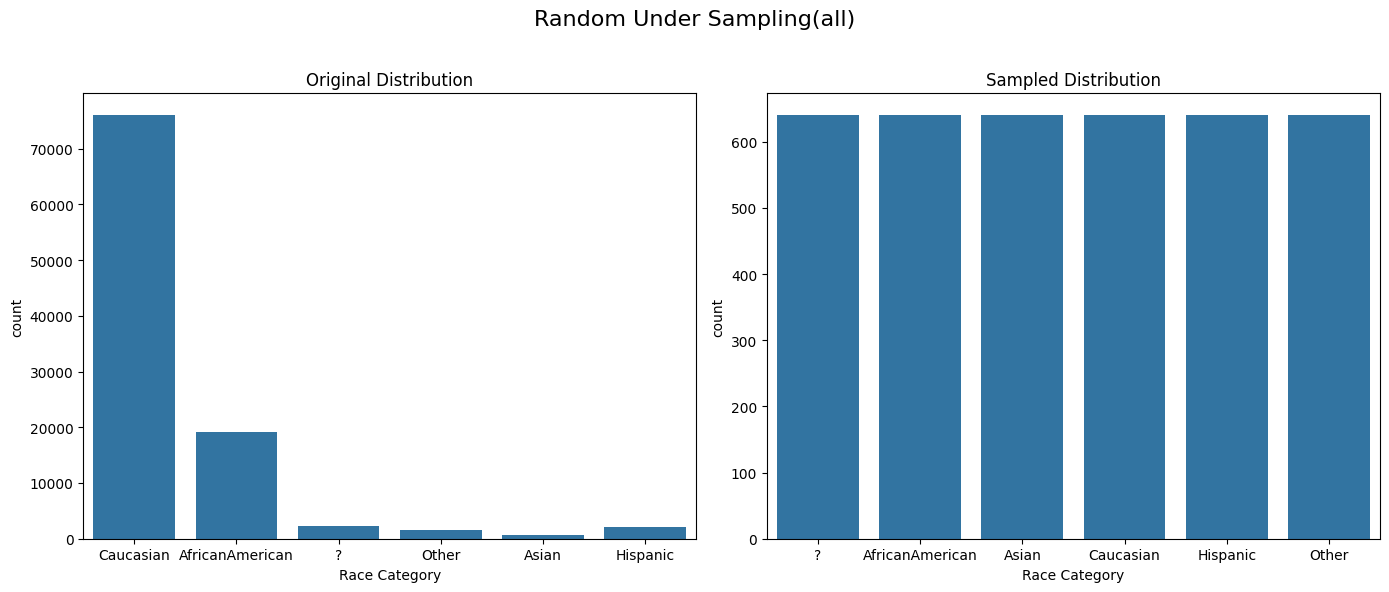

In [70]:
plot_class_distribution(y, y_rus_all, "Random Under Sampling(all)")

In [71]:
X = df.drop(columns=['readmitted', 'encounter_id', 'patient_nbr'], errors='ignore')
y = df['readmitted']

X = pd.get_dummies(X)

rus=RandomUnderSampler(sampling_strategy='not majority', random_state=1)
rus_majority=RandomUnderSampler(sampling_strategy='majority', random_state=1)
rus_all=RandomUnderSampler(sampling_strategy='all', random_state=1)

X_rus, y_rus=rus.fit_resample(X, y)
X_rus_maj, y_rus_maj=rus_majority.fit_resample(X, y)
X_rus_all, y_rus_all=rus_all.fit_resample(X, y)

print("Original Distribution:", Counter(y))
print("Under-Sampling distribution (not majority):", Counter(y_rus))
print("Under-Sampling distribution (majority):", Counter(y_rus_maj))
print("Under-Sampling distribution (all)", Counter(y_rus_all))

Original Distribution: Counter({'NO': 54864, '>30': 35545, '<30': 11357})
Under-Sampling distribution (not majority): Counter({'NO': 54864, '<30': 11357, '>30': 11357})
Under-Sampling distribution (majority): Counter({'>30': 35545, '<30': 11357, 'NO': 11357})
Under-Sampling distribution (all) Counter({'<30': 11357, '>30': 11357, 'NO': 11357})


In [ ]:
ros=RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_ros, y_ros=ros.fit_resample(X, y)
print("Original Distribution:", Counter(y))
print("Resampled Distribution(not majority)", Counter(y_ros))

plot_class_distribution(y, y_ros, "Resampled Distribution(not majority)")